In [44]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from dataPath import DATA_PATH
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['image.cmap'] = 'gray'

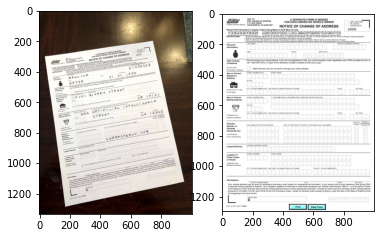

In [45]:
# Step: Read Image
imRef = cv.imread(DATA_PATH + "images/form.jpg", cv.IMREAD_COLOR)
im = cv.imread(DATA_PATH + "images/scanned-form.jpg", cv.IMREAD_COLOR)

plt.subplot(121)
plt.imshow(im[..., ::-1])
plt.subplot(122)
plt.imshow(imRef[..., ::-1])

In [46]:
# Step: Detect Feature
MAX_FEATURES = 500
im1Gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
im2Gray = cv.cvtColor(imRef, cv.COLOR_BGR2GRAY)

orb = cv.ORB_create(MAX_FEATURES)
kp1, des1 = orb.detectAndCompute(im1Gray, None)
kp2, des2 = orb.detectAndCompute(im2Gray, None)

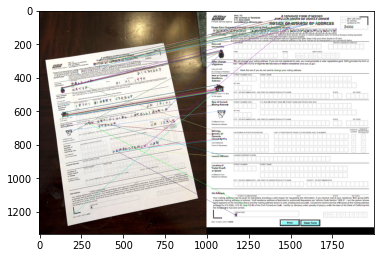

In [47]:
# Step: Match Feature
GOOD_MATCH_PERCENT = 0.15
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)

matches.sort(key=lambda x: x.distance, reverse=False)

numOfGoodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numOfGoodMatch]

imMatches = cv.drawMatches(im, kp1, imRef, kp2, matches, None)
plt.imshow(imMatches[..., ::-1])

In [48]:
# Step: Calculate Homography
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv.findHomography(points1, points2, cv.RANSAC)

[[ 1.39410158e+00 -2.00799432e-01 -8.38501432e+00]
 [ 2.21486061e-01  1.51141269e+00 -4.78696622e+02]
 [-6.63760729e-05  1.17767380e-04  1.00000000e+00]]


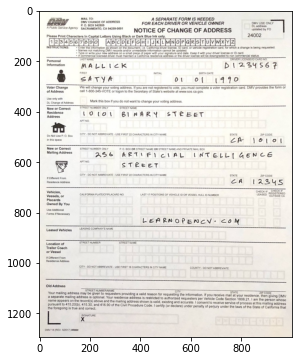

In [49]:
# Step: Warping Image
height, width, ch = imRef.shape
im1Reg = cv.warpPerspective(im, h, (width, height))
plt.imshow(im1Reg[..., ::-1])

print(h)